In [3]:
from greedy_solver import GreedyFJSSPWSolver
from instances.load_benchmarks import load_fjssp_w
import evaluation

In [4]:
# filters are defined as dictionaries and are used to select only benchmarks with the desired characteristics - the first value in the tuple is the lower bound and the second the upper bound
example_filter = {
    'n_operations': (50, 100),
    #'duration_variety': (0.01, 0.02),
    'flexibility': (0.0, 0.5),
    'n_jobs': (5, 10)
}

In [5]:
# the filters (as well as every possible entry in the filter) are optional and can be omitted, if all benchmarks should be used
instances = load_fjssp_w(example_filter)

In [6]:
results = dict()
# add an entry for each of the solvers - note that this name will be used in the plots
results['greedy'] = dict()
for solver in results:
    for instance in instances:
        encoding = instances[instance]
        # for the comparison of multiple solvers, create the required solver at this point
        greedy_solver = GreedyFJSSPWSolver(encoding.durations(), encoding.job_sequence())
        sequence, machines, worker = greedy_solver.solve()
        # only necessary if the output of the solver is in the sequence format. For solvers which have the start times of the operations already available, this step can be skipped
        start_times, machines, workers = evaluation.translate(sequence, machines, worker, encoding.durations())
        # evaluates the final solution to make sure all results will be evaluated correctly
        c = evaluation.makespan(start_times, machines, workers, encoding.durations())
        results[solver][instance] = c

In [7]:
import visualization

In [8]:
import csv
def get_best(instances):
    result = dict()
    with open('instances/InstanceData/FJSSP-W/best_known.csv', 'r') as f:
        csv_data = csv.DictReader(f, delimiter=';',  fieldnames=['name', 'fitness', 'lower_bound'])
        for data in csv_data:
            name = data['name']
            if name in instances:
                result[name] = float(data['fitness'])
    return result

# if the best known results are required for comparison
known_best = get_best(list(instances.keys()))
results['known_best'] = known_best

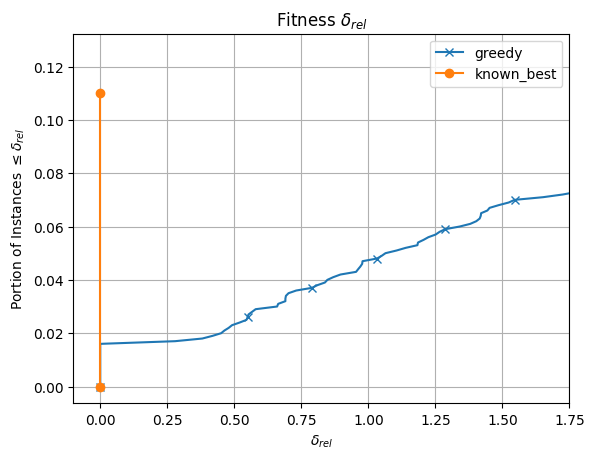

In [9]:
# this will create the CDF plot to compare the performance relative to the best found results
visualization.visualize_gaps(results)